# **Amazon Sales Report Analysis in Python with EDA**


# **🎯Goals**
Analyze the revenue of the top 4 categories and set revenue increase sales for all categories.
Analyze top 4 sales and promotions by state, then proceed with strategic promotions to increase revenue.

In [45]:
# supportive library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

# **Dataset Summary/ Initial Dataset View**

In [46]:
data = pd.read_csv('Amazon Sale Report.csv', low_memory=False)

In [47]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

There are a lot of missing data points in some columns! 

Columns datatypes : {object : 19}, {numeric : 4}, {bool : 1}

In [48]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Let's check null values with a heatmap.

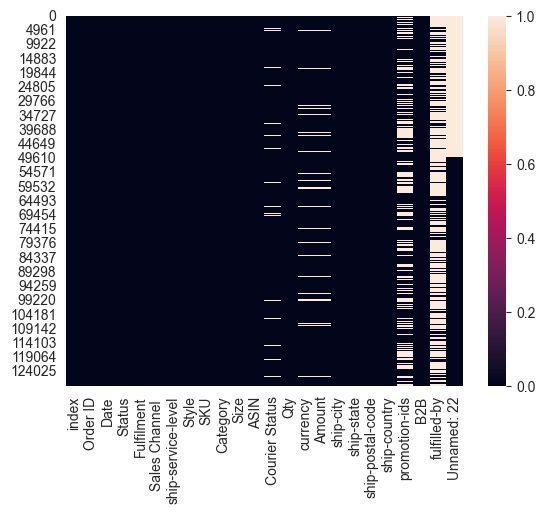

In [49]:
sns.heatmap(data.isnull())
plt.show()

It seems that there are null values in the columns: courier Status, currency, Amount, Promotion-ids, fulfilled-by, and Unnamed:22.

Let's start cleaning🧹

**Columns to drop()**

Unnamed: 22 - undeterminable data

fulfilled-by - only value was amazon courier "easy-ship" with no other relationship

ship-country - The shipping Country is India

currency - the currency is Indian Rupee (INR)

Sales Channel - assumed to be sold through amazon

In [50]:
# dropping Columns
data.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

**Columns dropduplicates()**

Order and ASIN - have 7 duplicated values based on order # and product # (ASIN)

In [51]:
# dropping duplicates (order and asin have 7 duplicated values)
data[data.duplicated(['Order ID','ASIN'], keep=False)]
len(data) - len(data.drop_duplicates(['Order ID','ASIN']))
data.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

**Columns fillna()**

Courier Status - will fill missing with 'Unknown'

promotion-ids - will fill missing with 'No Promotion'

Amount - will fill missing with 0, since 97% of of all Orders with missing Amount are cancelled

* ship-city 
* ship-state
* ship-postal-code 

In [52]:
# filling nan values
data['Courier Status']  # nan -> unknown
data['Courier Status'].fillna("unknown", inplace=True)
data["promotion-ids"]   # nan -> no promotion
data["promotion-ids"].fillna("no promotion", inplace=True)
data[data["Amount"].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))
data['Amount'].fillna(0,inplace=True)
data["ship-city"].fillna("unknown", inplace=True)
data['ship-state'].fillna('unknown', inplace = True)
data['ship-postal-code'].fillna('unknown', inplace = True)

**Renaming columns**

Renaming the column names for better readability.

In [53]:
mapper = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category', 
          'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_ship_status', 'Qty':'order_quantity', 
          'Amount':'order_amount_($)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip', 
          'promotion-ids':'promotion','B2B':'customer_type'}
data.rename(columns=mapper, inplace =True)

**Column Renaming and changing values**

B2B - changing to customer_type and changing the values to business and customer

Amount - changing to order_amount_() and converting from INR to $

date - dropping march from the datset seince there is only 1 day (3/21/22) from the month representing 0.1%

**Column Creation**

month - to use in analysis and groupbys
**Column Value Ordering**

size - created an ordered category of based on product sizes

In [54]:
# Convert B2B column values
data['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)
exchange_rate = 0.0120988
data['order_amount_($)'] = data['order_amount_($)'].apply(lambda x: x * exchange_rate)

# Creating Datetime
data['date'] = pd.to_datetime(data['date'])
march_dates = data['date'][data['date'].dt.month == 3]
print(march_dates.dt.day.nunique())
data = data[(data["date"].dt.month != 3)]

1


In [55]:
# Adding Month column
data['month'] = data["date"].dt.month
data["month"].unique()
month_map = {4: "April", 5: "May", 6:"June"}
data["month"] = data["date"].dt.month.map(month_map)
month_order = ["April", "May", "June"]
data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

print(f'This dataset contains the months {data["month"].unique()} for 2022')
# ealiest date
print(data["date"].min())
# latest date
print(data["date"].max())

# Define the desired order for the 'size' column
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']
# Create an ordered categorical variable for the 'size' column
data["size"] = pd.Categorical(data["size"], categories=size_order, ordered=True)

This dataset contains the months ['April', 'May', 'June']
Categories (3, object): ['April' < 'May' < 'June'] for 2022
2022-04-01 00:00:00
2022-06-29 00:00:00


**Checking The clean data**

In [56]:
data.describe(include="all")
data.isnull().sum()
print(data.nunique().to_frame(name='Count of unique values'))
print(data.apply(pd.unique).to_frame(name='Unique Values'))

                     Count of unique values
order_ID                             120220
date                                     90
ship_status                              13
fullfilment                               2
service_level                             2
style                                  1377
sku                                    7194
product_category                          9
size                                     11
asin                                   7189
courier_ship_status                       4
order_quantity                           10
order_amount_($)                       1409
city                                   8953
state                                    70
zip                                    9460
promotion                              5784
customer_type                             2
month                                     3
                                                         Unique Values
order_ID             [405-8078784-5731545, 171-91

# **Basic Analysis & Visualizations**

**Let's check the trend of monthly sales!**

   month  order_amount_($)
0  April     348913.764222
1    May     317285.195354
2   June     283410.111622


<Axes: xlabel='month', ylabel='order_amount_($)'>

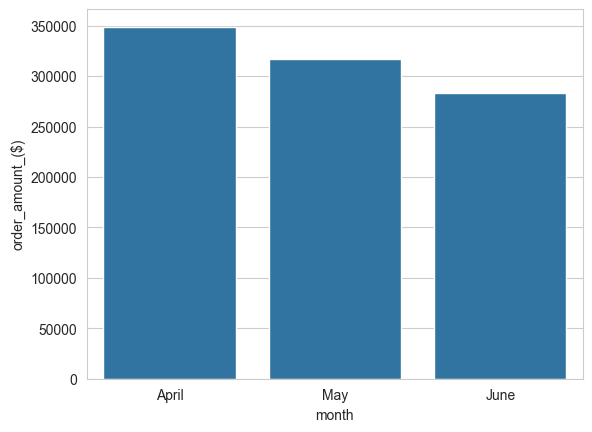

In [72]:
monthly_sales = pd.DataFrame(data.groupby("month")["order_amount_($)"].sum()).reset_index()
print(monthly_sales)
sns.barplot(x="month", y="order_amount_($)", data=monthly_sales)

In [58]:
monthly_sales = data.groupby("month")["order_amount_($)"].sum()
apr_to_may = (monthly_sales['April'] - monthly_sales['May']) / monthly_sales['April'] * 100
may_to_jun = (monthly_sales['May'] - monthly_sales['June']) / monthly_sales['May'] * 100
total_decrease = (monthly_sales['April'] - monthly_sales['June']) / monthly_sales['April'] * 100
print(f"Total revenue for April 2022: ${monthly_sales['April']:,.2f}")
print(f"Total revenue for May 2022: ${monthly_sales['May']:,.2f}, which is a -{apr_to_may:.2f}% decrease from April.")
print(f"Total revenue for June 2022: ${monthly_sales['June']:,.2f}, which is a -{may_to_jun:.2f}% decrease from May.")
print(f"Total revenue for Q2 2022 decreased by -{total_decrease:.2f}%")
print("\n")

Total revenue for April 2022: $348,913.76
Total revenue for May 2022: $317,285.20, which is a -9.06% decrease from April.
Total revenue for June 2022: $283,410.11, which is a -10.68% decrease from May.
Total revenue for Q2 2022 decreased by -18.77%




We need to halt the downward trend in Q2

Let's see the sales by category.

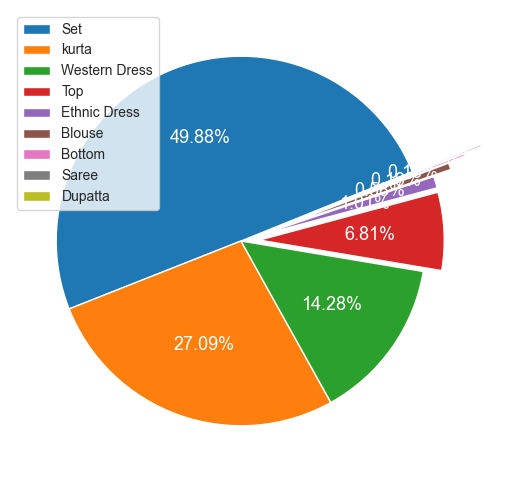

Percentage of revenue by product category:
product_category
Set              49.88
kurta            27.09
Western Dress    14.28
Top               6.81
Ethnic Dress      1.01
Blouse            0.58
Bottom            0.19
Saree             0.16
Dupatta           0.00
Name: order_amount_($), dtype: float64




In [76]:
# Define data
category_sales = data.groupby('product_category')['order_amount_($)'].sum()
category_sales = category_sales.sort_values(ascending=False)
category_pct = (category_sales / category_sales.sum() * 100).sort_values(ascending=False)
category_pct = category_pct.round(2)

fig, ax = plt.subplots(figsize =(8,6))
explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6)
plt.pie(category_pct,autopct='%1.2f%%',startangle=22, explode=explode, textprops={"size" : 13, "color" : "w"})
plt.legend(category_pct.index)
plt.show()

print("Percentage of revenue by product category:")
print(category_pct)
print("\n")

The category 'Set' has the highest sales proportion at 49.88%.

Top 4

1. Set              49.88
1. kurta            27.09
1. Western Dress    14.28
1. Top               6.81

Sum of the remainders 2.94 % 


In [60]:
#We need to check the average price per item. I'm curious to know what the top 5 are.
Avg_price = data.groupby("product_category")["order_amount_($)"].mean().sort_values(ascending=False)
Avg_price.head(5)

product_category
Set              9.434042
Saree            9.142986
Western Dress    8.754014
Ethnic Dress     8.255171
Top              6.091331
Name: order_amount_($), dtype: float64

Let's find out the cancellation rate, return rate, and combined cancellation and return rate.

In [61]:
# Cancelled rate
# Cancelled , Shipped - Lost in Transit -> mapping Cancelled
cancelled = data[data["ship_status"].isin(['Cancelled', 'Shipped - Lost in Transit'])]


# Return rate
# Shipped - Returned to Seller, Shipped - Returning to Seller, Shipped - Rejected by Buyer, Shipped - Damaged -> map to Return 
returned = data[data['ship_status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Damaged'])]
cancelled_ttl = len(cancelled)
returned_ttl = len(returned)
returned_pct = returned_ttl / len(data) * 100
cancelled_pct = cancelled_ttl / len(data) * 100

# Cancelld + Return rate -> Back rate 
Back_total = cancelled_ttl + returned_ttl
Back_pct = Back_total / len(data) * 100

print(f"Total cancelled orders: {cancelled_ttl}, which is {cancelled_pct:.2f}% of all orders.")
print(f"Total returned orders: {returned_ttl}, which is {returned_pct:.2f}% of all orders.")
print(f"This represents {Back_pct:.2f}% of all orders.")
print("\n")

Total cancelled orders: 18316, which is 14.22% of all orders.
Total returned orders: 2109, which is 1.64% of all orders.
This represents 15.86% of all orders.




# **Visualizations**

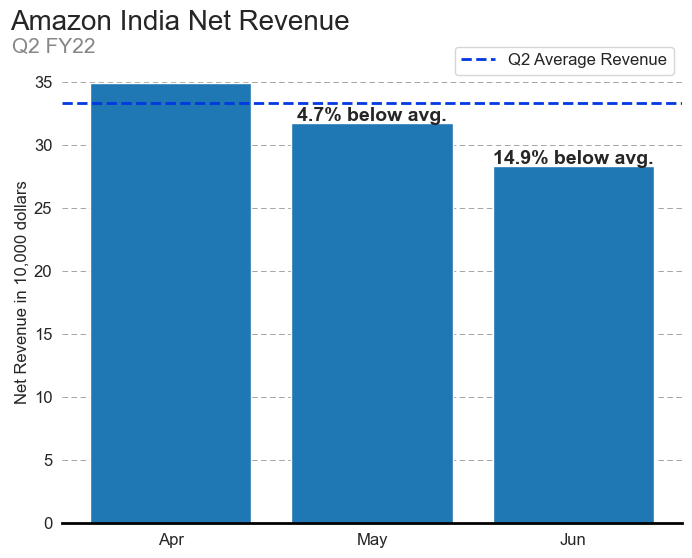

Q2 Average sales : 333099.48


In [82]:
# Defining variables for calculating the current month and Q2 average.
monthly_sales1 = data.groupby(pd.Grouper(key='date', freq='M')).agg({'order_amount_($)': 'sum'})
latest_month = monthly_sales1.tail(1).iloc[0][0]
quarterly_avg = monthly_sales1.tail(3).head(2).mean()[0]

# Graph
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(8,6))
bars = ax.bar(monthly_sales1.index.strftime('%b'), monthly_sales1['order_amount_($)'])

# Inserting arrows and text.
for i, bar in enumerate(bars):
    if i == len(bars) - 1 or i < len(bars) - 2:
        continue
    month_sales = monthly_sales1.iloc[i]['order_amount_($)']
    pct_below_avg = round((1 - (month_sales / quarterly_avg)) * 100, 1)
    ax.annotate(f'{pct_below_avg}% below avg.', 
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()-7000), 
                xytext=(0, 5), textcoords='offset points',  fontweight='bold', 
                ha='center', va='bottom', fontsize=14)
latest_bar = bars[-1]
latest_month_sales = latest_bar.get_height()
pct_below_avg = round((1 - (latest_month_sales / quarterly_avg)) * 100, 1)
ax.annotate(f'{pct_below_avg}% below avg.', 
            xy=(latest_bar.get_x() + latest_bar.get_width()/2, latest_bar.get_height()-7000), 
            xytext=(0, 5), textcoords='offset points',  fontweight='bold',
            ha='center', va='bottom', fontsize=14)

# Inserting Q2 Average line
plt.axhline(quarterly_avg, linestyle='--', color='#0038E2',linewidth=2, label='Q2 Average Revenue')

ax.set_title('Amazon India Net Revenue', fontsize=20, x=.19, y=1.05)
ax.text(-.08, 1.02, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_yticklabels(list(range(0,41,5)))
ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)
plt.legend(bbox_to_anchor=(1,1.05), fontsize=12, fancybox=True)

ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

print(f"Q2 Average sales : {quarterly_avg:.2f}")

I calculated the average sales for Q2 and found that in May, there was a decrease of 4.7% compared to the average sales, while in June, there was a decrease of 14.9%.

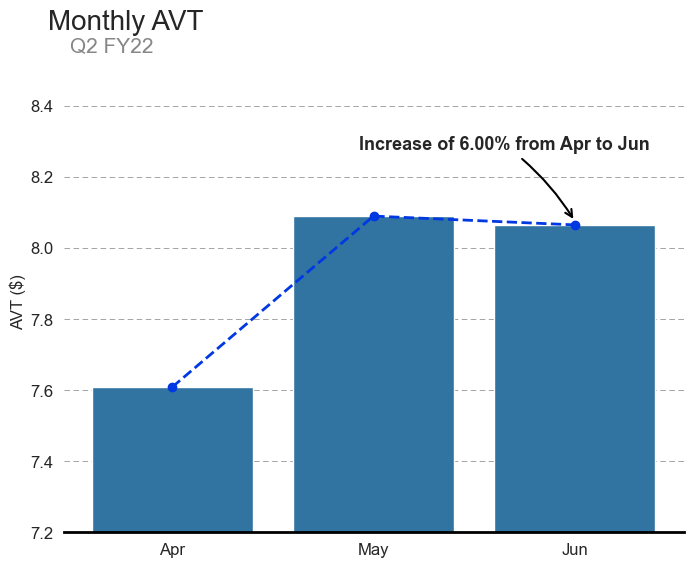

AVT of April : 7.61$
AVT of June : 8.06$


In [83]:
# Group the data by month and calculate the average order value
monthly_aov = data.groupby(pd.Grouper(key = "date", freq = "ME")).agg({"order_amount_($)" : "sum", "order_ID" : "nunique"})
monthly_aov["AVT"] = monthly_aov["order_amount_($)"] / monthly_aov["order_ID"]   # AVT 

# Calculate percent change from previous month
monthly_aov["pct_change"] = monthly_aov['AVT'].pct_change()*100

# Create a barplot of the average order value per month
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x=monthly_aov.index.strftime('%b'), y = monthly_aov['AVT'], ax = ax)

# Add line plot of the average order value per month
ax.plot(monthly_aov.index.strftime('%b'), monthly_aov["AVT"], linestyle = "--", linewidth = 2, color = '#0038E2', marker = 'o')

# Add callout for percent increase from April to June
apr_val = monthly_aov['AVT'][0]
jun_val = monthly_aov['AVT'][2]
pct_change = ((jun_val - apr_val) / apr_val) * 100
ax.annotate(f'Increase of {pct_change:.2f}% from Apr to Jun',fontweight='bold',
             xy=(2,8.074941567466606), xytext=(1.65, 8.264941567466606), fontsize=13, 
             ha='center', va='bottom', arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=-0.1"))

ax.set_title('Monthly AVT', fontsize=20, x=.10, y=1.07)
ax.text(0.01, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('AVT ($)', fontsize=12, labelpad=3)
ax.set_ylim(7.20, 8.50)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()

print(f"AVT of April : {apr_val:.2f}$")
print(f"AVT of June : {jun_val:.2f}$")

Fortunately, the Monthly Average Transaction Value (AVT) increased by approximately 6% from April to June

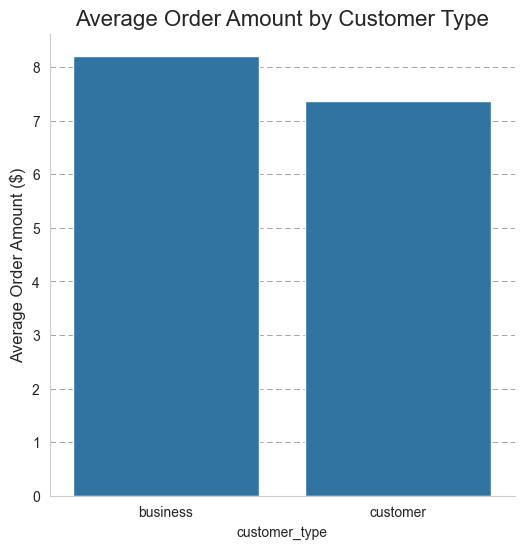

customer_type
business    8.212471
customer    7.367197
Name: Avg_order_amount_by_customer_type, dtype: float64
The average Order Amount by business is more than  11.47% the customer


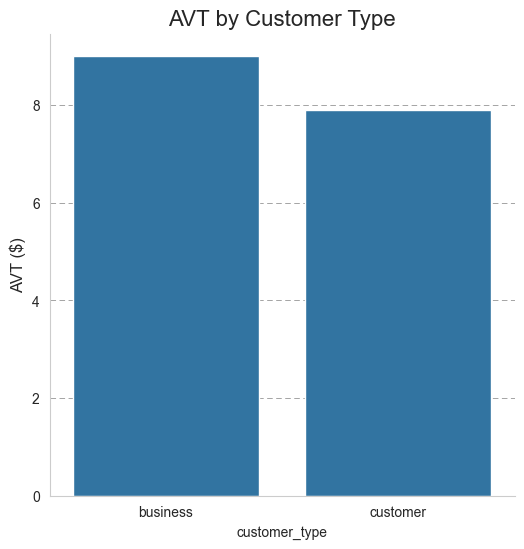

customer_type
business    9.008894
customer    7.891548
Name: AVT_by_customer_type, dtype: float64
The average Order Amount by business is more than  14.16% the customer


In [89]:
#Sales by customer type.
AVT_by_customer_type = data.groupby("customer_type").agg({"order_amount_($)" : "sum", "order_ID" : "nunique"})
AVT_by_customer_type["AVT_by_customer_type"] = AVT_by_customer_type["order_amount_($)"] / AVT_by_customer_type["order_ID"]
AVT_by_customer_type["Avg_order_amount_by_customer_type"] = data.groupby('customer_type')['order_amount_($)'].mean()
AVT_by_customer_type.drop(columns=["order_amount_($)", "order_ID"], inplace=True)

# Define the Avg order Amount and AVT by customer type.
avgamt = AVT_by_customer_type["Avg_order_amount_by_customer_type"]
avt = AVT_by_customer_type["AVT_by_customer_type"]

plt.figure(figsize=(6, 6))
sns.barplot(x=avgamt.index, y=avgamt.values)
plt.title('Average Order Amount by Customer Type', fontsize=16)
plt.ylabel('Average Order Amount ($)', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print(avgamt)
rate = ((avgamt[0] - avgamt[1]) / avgamt[1]) * 100
print(f"The average Order Amount by business is more than {rate : .2f}% the customer")

plt.figure(figsize=(6, 6))
sns.barplot(x=avt.index, y=avt.values)
plt.title('AVT by Customer Type', fontsize=16)
plt.ylabel('AVT ($)', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
print(avt)
rate1 = ((avt[0] - avt[1]) / avt[1]) * 100
print(f"The average Order Amount by business is more than {rate1 : .2f}% the customer")


Average Order Amount and AVT are both higher for business customers. 

**Therefore, expanding B2B operations is likely to lead to an increase in sales!!**

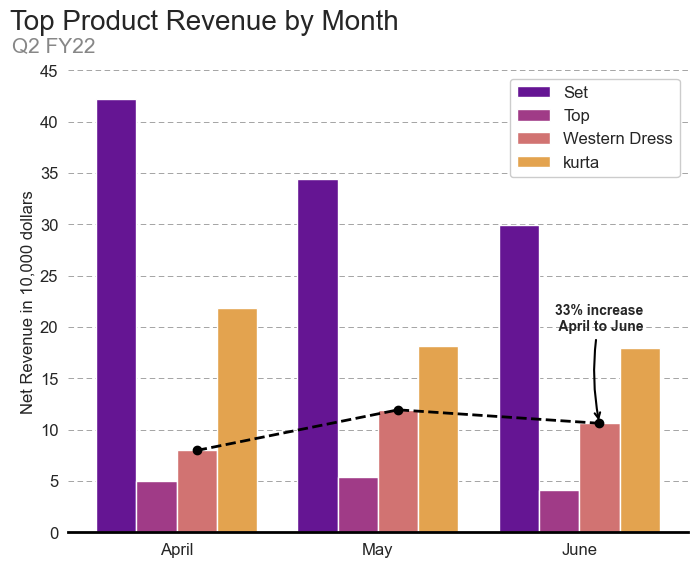

In [65]:
fig, ax = plt.subplots(figsize = (8,6))

# Filter the data to only include the four product categories of interest
data.groupby("product_category")["order_amount_($)"].sum().sort_values(ascending=False)
sales_data = data[data["product_category"].isin(["Western Dress","Top", "kurta","Set"])]

# Convert the date column to a datetime object
sales_data["date"] = pd.to_datetime(sales_data["date"])
sales_by_month = sales_data.groupby(["month", "product_category"])["order_amount_($)"].sum().reset_index()
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)
ax = sns.barplot(x ='month', y = "order_amount_($)", hue = "product_category", data = sales_by_month, palette='plasma')

# Extract the sales data for Western Dress
sales_wd = sales_by_month[sales_by_month['product_category'] == 'Western Dress'].reset_index(drop=True)
sales_wd['month'] = pd.Categorical(sales_wd['month'], categories=month_order, ordered=True)
sales_wd.sort_values(by='month',inplace=True)

ax.plot([0.1,1.1,2.1], sales_wd['order_amount_($)'], color='black', linestyle='--', linewidth=2, marker='o')

# Add annotation for percent increase from April to June for Western Dress
pct_increase = (sales_wd.loc[2, 'order_amount_($)'] - sales_wd.loc[0, 'order_amount_($)']) / sales_wd.loc[0, 'order_amount_($)'] * 100
ax.annotate(f'{pct_increase:.0f}% increase\n April to June',fontweight='bold', xy=(2.1, sales_wd.loc[2, 'order_amount_($)']), xytext=(1.88, sales_wd.loc[2, 'order_amount_($)'] + 40000),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5, connectionstyle="arc3,rad=0.1"))

num_y_ticks = 10
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)
ax.set_yticks(y_tick_values)

# Add title and axis labels
ax.set_title('Top Product Revenue by Month', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(1,1), fontsize=12, framealpha=1)
ax.set_xlabel(None)
ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)
ax.set_yticklabels(list(range(0,46,5)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.tick_params(axis='both', labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

When overall sales are declining, Western Dress is showing growth among the top four categories.

Let's find the median of the sales amount distribution for Western Dress. 

We excluded values with canceled orders and zero amounts, considering them insignificant.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


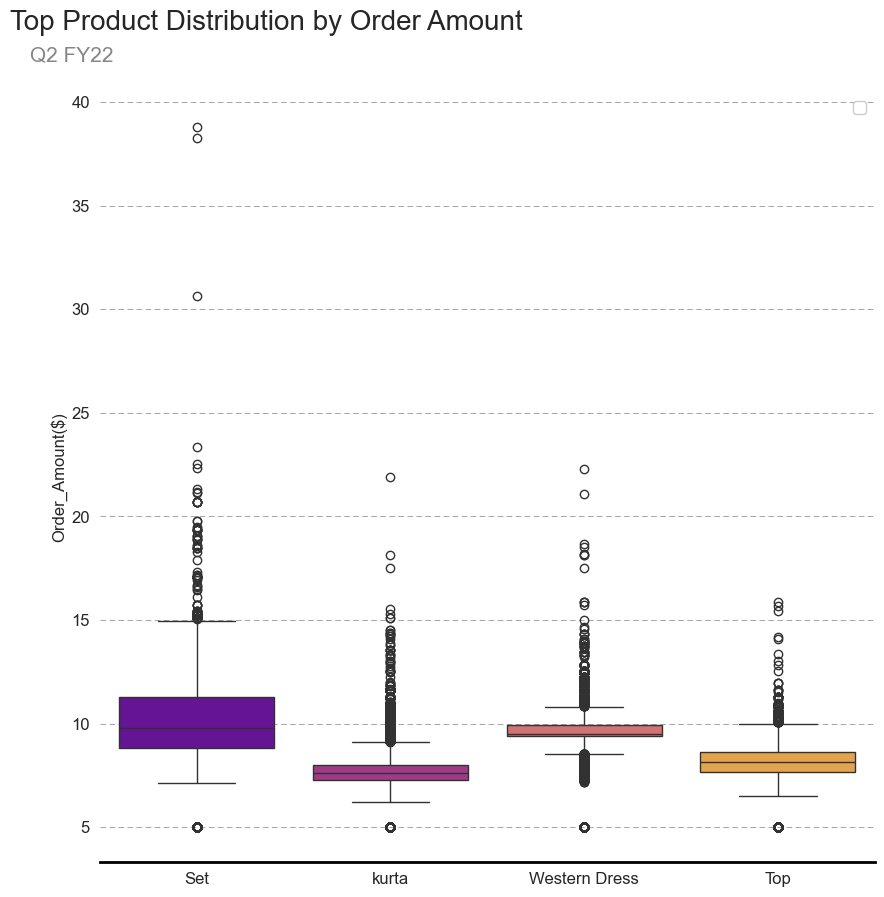

In [66]:
# Examine the distribution of total sales amount for Western dresses in the sales data using a box plot.
# I dropped the entries with a order status of 'cancelled' and a total amount of 0, as they were deemed insignificant in the sales data.
sales_data[(sales_data["ship_status"] == "Cancelled") & (sales_data["order_amount_($)"] == 0)]
len(sales_data[(sales_data["ship_status"] == "Cancelled") & (sales_data["order_amount_($)"] == 0)])
sales_data.drop(sales_data[(sales_data["ship_status"] == "Cancelled") & (sales_data["order_amount_($)"] == 0)].index, inplace=True)

data.apply(pd.unique).to_frame(name='Unique Values')
fig, ax = plt.subplots(figsize = (10,10))

# Graph
sns.boxplot(x = "product_category", y = "order_amount_($)",palette="plasma", data = sales_data)
ax.set_title('Top Product Distribution by Order Amount ', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(1,1), fontsize=12, framealpha=1)
ax.set_xlabel(None)
ax.set_ylabel('Order_Amount($)', fontsize=12, labelpad=3)
ax.set_yticklabels(list(range(0,46,5)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.tick_params(axis='both', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

Western Dress is a category that showed growth in Q2, and it had more outliers compared to other graphs, so we examined the median value instead of the mean. 
The median value for Western Dress is positioned on the higher end.

Let's examine the specific price distribution with a histogram.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


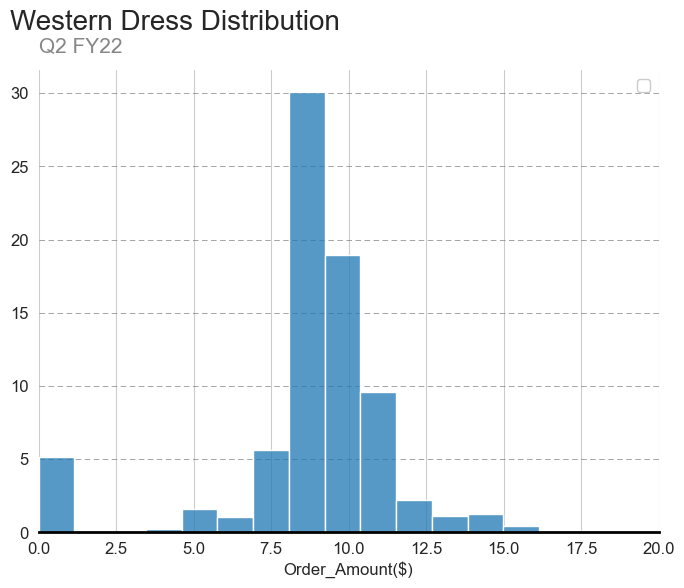

In [67]:
# To examine the specific distribution of 'Western Dress's amounts
# I used a histogram.
fig, ax = plt.subplots(figsize = (8,6))
wd_data = data[data["product_category"].isin(["Western Dress"])].reset_index()

sns.histplot(x = "order_amount_($)",bins = 30, data = wd_data)
ax.set_title('Western Dress Distribution', fontsize=20, x=.22, y=1.07)
ax.text(0.00, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(1,1), fontsize=12, framealpha=1)
ax.set_ylabel(None)
ax.set_xlabel('Order_Amount($)', fontsize=12, labelpad=3)
ax.set_yticklabels(list(range(0,46,5)))
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.tick_params(axis='both', labelsize=12)
ax.set_xlim(0, 20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()


The high price range and strong sales performance of Western Dress make it a key target for future business development. Based on this, it's feasible to build a business strategy around it.

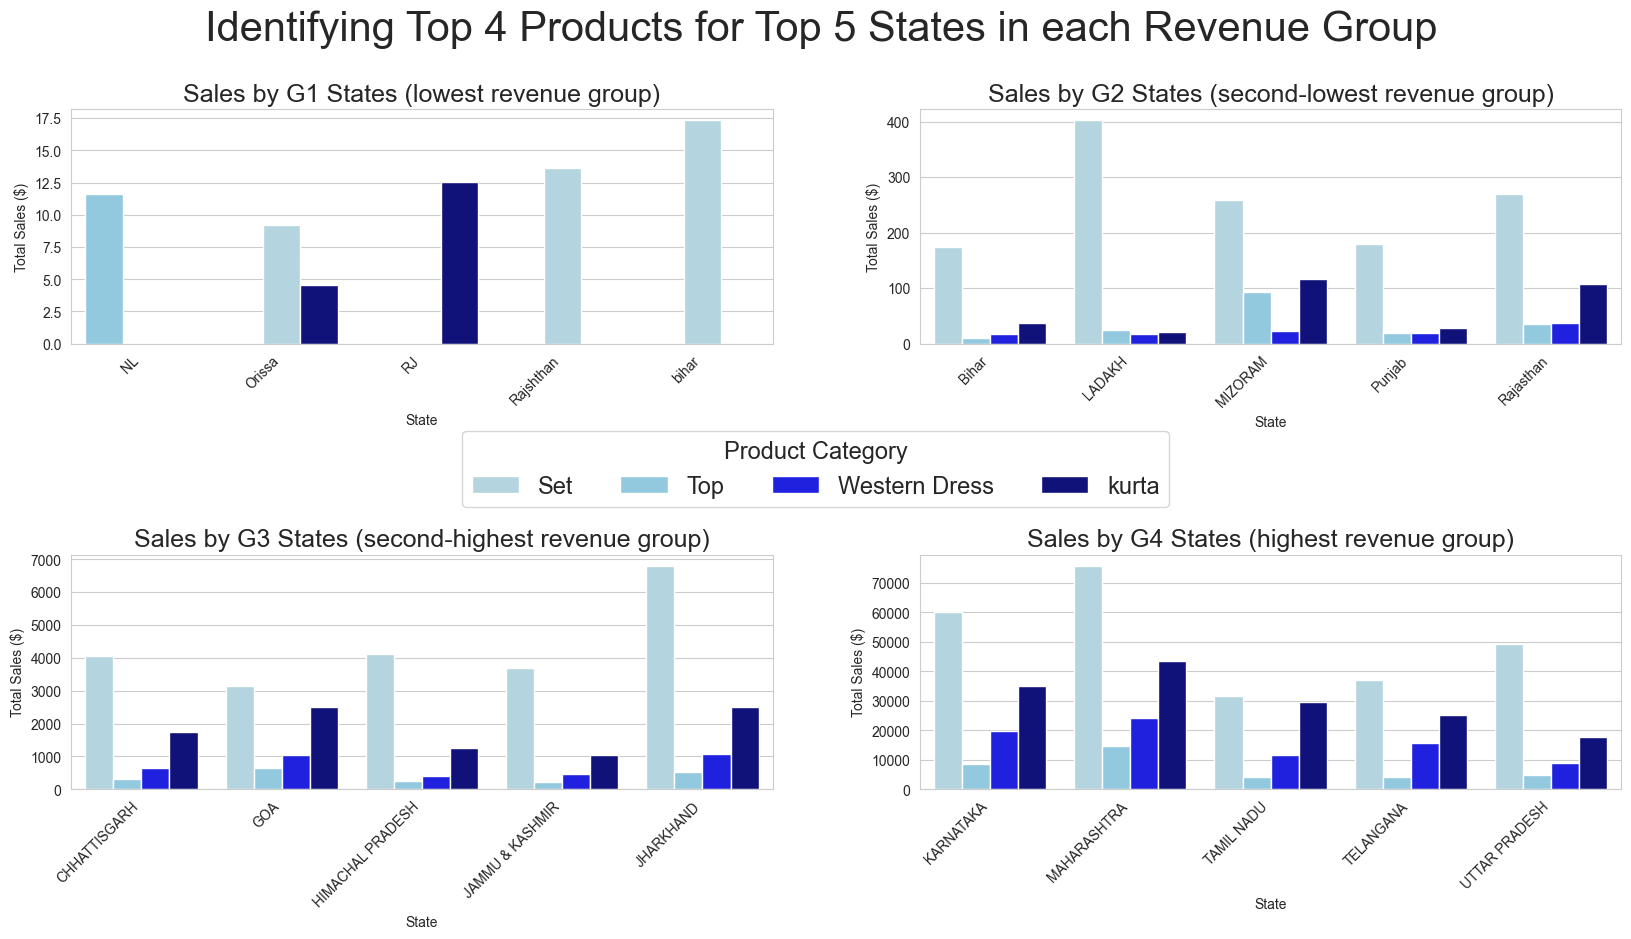

In [91]:
# Classify the top 20 states in sales into four groups, each containing five states

colors = {"Top" : '#87CEEB', 'Set' :"#ADD8E6" , 'kurta' : "#00008B", 'Western Dress':'#0000FF'}

# Group the data by state and calculate the total sales
state_sales = data.groupby("state")["order_amount_($)"].sum()

# Get the top 5 and bottom 5 states by sales
nstate = len(state_sales)
group = pd.qcut(state_sales, 4, labels = ["G1", "G2","G3","G4"])
top_states = []
for g in ["G1", "G2","G3","G4"]:
    top_states += state_sales[group == g].nlargest(5).index.to_list()
    
# Filter the dataframe to include only the top states
top_sales = data[data["state"].isin(top_states)]
sales_by_state_product = top_sales.groupby(["state", "product_category"])["order_amount_($)"].sum().reset_index()

# Get the top 4 products for each quartile
top_products = []
for g in ['G1', 'G2', 'G3', 'G4']:
    top_products += sales_by_state_product[sales_by_state_product['state'].isin(state_sales[group == g].index)].groupby('state').apply(lambda x: x.nlargest(4, 'order_amount_($)'))['product_category'].tolist()

# G1 (lowest revenue group)
fig, axs = plt.subplots(2,2, figsize = (20,10), sharey = False)
G1_sales = sales_by_state_product[sales_by_state_product["state"].isin(state_sales[group=="G1"].index)]
G1_sales = G1_sales[G1_sales["product_category"].isin(top_products)]
sns.barplot(x = "state", y = "order_amount_($)", hue = "product_category", data = G1_sales, ax = axs[0,0], palette=colors)
axs[0, 0].legend().set_visible(False)
axs[0, 0].set_title('Sales by G1 States (lowest revenue group)',fontsize = 18)
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Total Sales ($)')

# G2 (second-lowest revenue group)
G2_sales = sales_by_state_product[sales_by_state_product["state"].isin(state_sales[group=="G2"].index)]
G2_sales = G2_sales[G2_sales["product_category"].isin(top_products)]
sns.barplot(x = "state", y = "order_amount_($)", hue = "product_category", data = G2_sales, ax = axs[0,1], palette=colors)
axs[0, 1].legend().set_visible(False)
axs[0, 1].set_title('Sales by G2 States (second-lowest revenue group)',fontsize = 18)
axs[0, 1].set_xlabel('State')
axs[0, 1].set_ylabel('Total Sales ($)')

# G3 (second-highest revenue group)
G3_sales = sales_by_state_product[sales_by_state_product["state"].isin(state_sales[group=="G3"].index)]
G3_sales = G3_sales[G3_sales["product_category"].isin(top_products)]
sns.barplot(x = "state", y = "order_amount_($)", hue = "product_category", data = G3_sales, ax = axs[1,0], palette=colors)
axs[1, 0].legend().set_visible(False)
axs[1, 0].set_title('Sales by G3 States (second-highest revenue group)',fontsize = 18)
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Total Sales ($)')

# G4 (highest revenue group)
G4_sales = sales_by_state_product[sales_by_state_product["state"].isin(state_sales[group=="G4"].index)]
G4_sales = G4_sales[G4_sales["product_category"].isin(top_products)]
sns.barplot(x = "state", y = "order_amount_($)", hue = "product_category", data = G4_sales, ax = axs[1,1], palette=colors)
axs[1, 1].legend().set_visible(False)
axs[1, 1].set_title('Sales by G4 States (highest revenue group)',fontsize = 18)
axs[1, 1].set_xlabel('State')
axs[1, 1].set_ylabel('Total Sales ($)')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=.9, wspace=.21, bottom=.2)
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# legend
handles, labels = axs[1, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=len(labels), title='Product Category', fontsize=17, title_fontsize = 17)
plt.suptitle("Identifying Top 4 Products for Top 5 States in each Revenue Group", fontsize = 30)
plt.show()



Now let's find out the promotion ratio for the top 4 category sales in each state.

* G3, G4

In the G3 and G4 groups, sales are generally highest for Set, Kurta, Western Dress, and Top, in that order. 
However, there is a need for increased sales of Western Dress and Top.

* G1, G2

G1 and G2 exhibit irregular patterns, and efforts to increase sales should be tailored to each state. For example, in G2, states like Bihar, LADAKH, and Punjab show significantly lower sales for Kurta, indicating a need for Kurta-related promotions. In G1, even among the top 4 categories, only one or two products generate sales in each state, highlighting the necessity for boosting sales of products that are currently not performing well in each state.


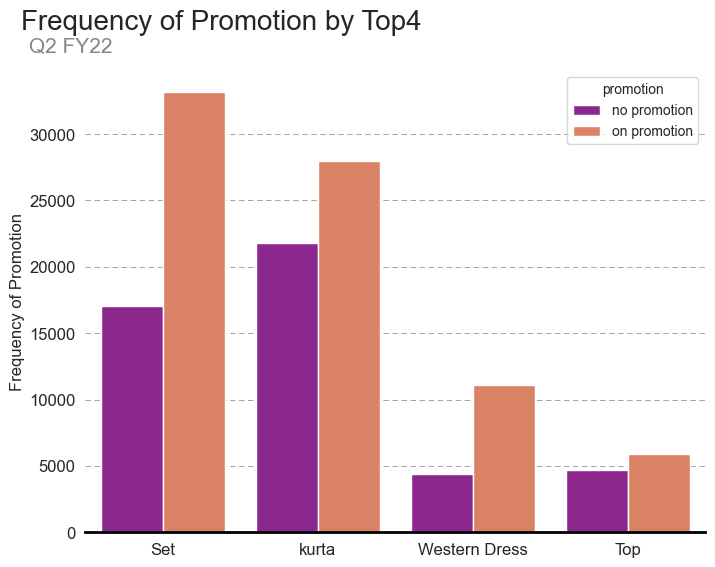

The quantity of 'Set' promotion is 33,151 and the quantity of 'Set' promotions without any promotion is 17,055
The quantity of 'kurta' promotion is 27,968 and the quantity of 'kurta' promotions without any promotion is 21,829
The quantity of 'Western Dress' promotion is 11,097 and the quantity of 'Western Dress' promotions without any promotion is 4,394
The quantity of 'Top' promotion is 5,935 and the quantity of 'Top' promotions without any promotion is 4,678


In [69]:
#  Find out the promotion status of the top 4 categories.
sales_data_2 = data[data["product_category"].isin(["Set","kurta","Western Dress","Top"])]
promotion = sales_data_2.groupby("product_category")["promotion"].value_counts()

# Convert all data except 'no promotion' to 'on promotion'.
sales_data_2["promotion"] = sales_data_2['promotion'].apply(lambda x: "on promotion" if x != "no promotion" else x)
promotion_category = sales_data_2.groupby(["product_category", "promotion"])["date"].count().reset_index()
promotion_category = promotion_category.rename(columns={"date": "Count"})

# Sorting by sum of Count
promotion_category_sum = promotion_category.groupby(['product_category', 'promotion'])['Count'].sum().unstack(fill_value=0)
promotion_category_sorted = promotion_category_sum.sort_values(by='on promotion', ascending=False).stack()
promotion_category_sorted = promotion_category_sorted.reset_index(name="Count")

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(promotion_category_sorted.reset_index(), x = "product_category", y = "Count", hue = "promotion", palette='plasma')
ax.set_title('Frequency of Promotion by Top4', fontsize=20, x=.22, y=1.07)
ax.text(-0.09, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_ylabel('Frequency of Promotion', fontsize=12, labelpad=3)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))

ax.tick_params(axis='both', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

print(f"The quantity of 'Set' promotion is {promotion_category_sorted.iloc[1,2]:,} and the quantity of 'Set' promotions without any promotion is {promotion_category_sorted.iloc[0,2]:,}")
print(f"The quantity of 'kurta' promotion is {promotion_category_sorted.iloc[3,2]:,} and the quantity of 'kurta' promotions without any promotion is {promotion_category_sorted.iloc[2,2]:,}")
print(f"The quantity of 'Western Dress' promotion is {promotion_category_sorted.iloc[5,2]:,} and the quantity of 'Western Dress' promotions without any promotion is {promotion_category_sorted.iloc[4,2]:,}")
print(f"The quantity of 'Top' promotion is {promotion_category_sorted.iloc[7,2]:,} and the quantity of 'Top' promotions without any promotion is {promotion_category_sorted.iloc[6,2]:,}")

# **Insight**
In the 4th group, 'set' stands out with a high proportion already on promotion.

In the 1st and 2nd top groups, 'kurta' ranks second. Despite being on 'no promotion,' it has high sales volume, suggesting that implementing promotions could further increase sales.

For 'set,' since promotions are overwhelmingly high, maintaining or increasing the current status of promotions is necessary to boost sales.

Considering the moderate sales of 'Western Dress' in the top groups, promotions for 'Western Dress' should be carried out.

In the lower group, 'Western Dress' sales are not high. Therefore, promotions focused on 'set' and 'kurta' seem preferable for the lower group.